In [5]:
using PyPlot

# Requirements
## Inputs:
* evenly spaced time series, at some time interval delta_t
    * floats, or ints
* delay time (int) -- multiples of delta_t
* embedding dimension (int) -- m

## Outputs:
* array of m-dimensional vectors (of same type as time series)
* plot 2d projection of embedding (perhaps specify view)

## This Approach
1. Get the m-dimensional vectors --> comb_data() 
2. plot it --> project_data()

In [8]:
function project_data()
end

project_data (generic function with 1 method)

In [107]:
t_1 = [x for x in 1.0:300_000_0.0];

In [55]:
m = 2
tau = 2

2

In [180]:
c = zeros(4,2)
c[1,:] = [1,2]
c

4×2 Array{Float64,2}:
 1.0  2.0
 0.0  0.0
 0.0  0.0
 0.0  0.0

In [193]:
"""
comb_data(series, spacing, num_teeth)

Return a new array of row vectors, each of which samples a data `series`.
Each vector starts with a value from the `series`, and then is followed by 
other values that are spaced by `spacing` number of values. The size of the 
vector is `num_teeth`, like the teeth of a comb.
 
"""
function comb_data(series, spacing::Int, num_teeth::Int)
    n_vecs = length(series) - num_teeth * spacing
    c = zeros(n_vecs, num_teeth)
    for i in 1:n_vecs
        #push!(c, series[i:spacing:(i+num_teeth*spacing-1)])
        c[i,:] = series[i:spacing:(i+num_teeth*spacing-1)]
    end
    return c
end

comb_data

In [194]:
function comb_data_faster(series, skip::UInt, num_teeth::Int)
    return [series[i:skip:(i+num_teeth*skip)] for i in 1:length(series)-num_teeth*skip]
end

comb_data_faster (generic function with 2 methods)

In [195]:
@time p = comb_data(t_1, tau, m);

  0.901751 seconds (15.00 M allocations: 846.994 MiB, 37.18% gc time)


In [196]:
@time c = comb_data_faster(t_1, tau, m);

  1.989803 seconds (9.00 M allocations: 617.978 MiB, 53.16% gc time)


In [197]:
s = [x for x in 1.0:20];
tau = 2
m = 7
p = comb_data(s, tau, m)

6×7 Array{Float64,2}:
 1.0  3.0   5.0   7.0   9.0  11.0  13.0
 2.0  4.0   6.0   8.0  10.0  12.0  14.0
 3.0  5.0   7.0   9.0  11.0  13.0  15.0
 4.0  6.0   8.0  10.0  12.0  14.0  16.0
 5.0  7.0   9.0  11.0  13.0  15.0  17.0
 6.0  8.0  10.0  12.0  14.0  16.0  18.0

In [198]:
p[:,[1,2]]

6×2 Array{Float64,2}:
 1.0  3.0
 2.0  4.0
 3.0  5.0
 4.0  6.0
 5.0  7.0
 6.0  8.0

In [199]:
"""
project_data(A, dim1, dim2)

Projecs `A`, a matrix of row vectors, onto a 2d plane. 2D plane is defined
by dimensions of data to project on eg 1,2 projects onto plane defined by
first and second dimension. Assumes that each vector spans the second 
dimension of A. Note that this essentially strips all the other dimensions
away from the input matrix.

"""
function project_data(A, dim1, dim2)
    A[:, [dim1, dim2]]
end

project_data

In [204]:
pd = project_data(p, 1, 4)

6×2 Array{Float64,2}:
 1.0   7.0
 2.0   8.0
 3.0   9.0
 4.0  10.0
 5.0  11.0
 6.0  12.0

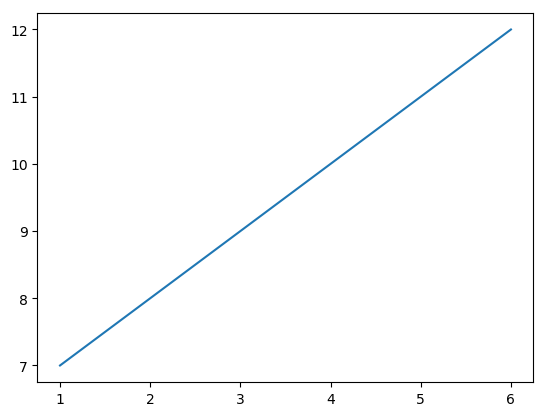

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x19a6b7310>

In [205]:
plot(pd[:,1], pd[:,2])

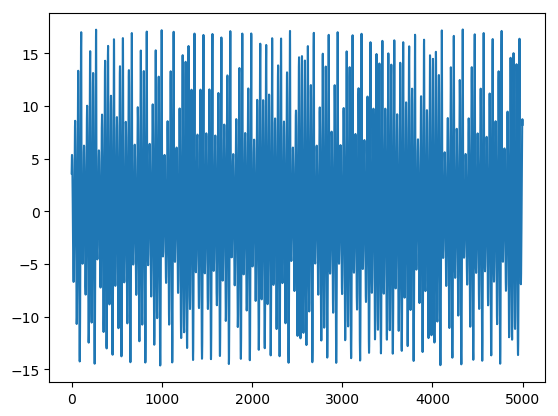

(5000, 1)

In [276]:
D = readcsv("amplitude_data.csv")
plot(D)
print(size(D))

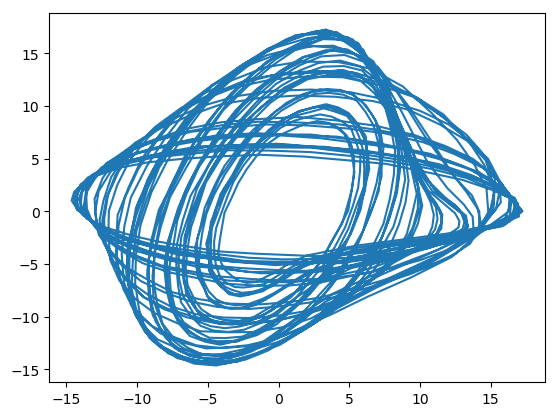

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x23d68e690>

In [283]:
tau = 40 #step
m = 7 #embedding dimension
u = 1
v = 2
d = D[1:2000]
combed_data = comb_data(d, tau, m)
prj = project_data(combed_data, u, v)
plot(prj[:,1], prj[:,2])

# Next Steps
Would be neat to see the effect of changing tau on the projection as a grid, or better yet an animation!